In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
path='C:/GitHub/Customer-Segmentation/data.xlsx'
df=pd.read_excel(path)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.count()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [6]:
df_not_nan=df[df['CustomerID'].notna()]

In [7]:
df.count()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [8]:
# Tinh RFD
# tinh R = recently
df_not_nan['InvoiceDate'] = pd.to_datetime(df_not_nan['InvoiceDate'],format='%Y-%m-%d %H:%M:%S')
import datetime
current_date=max(df_not_nan['InvoiceDate']) +datetime.timedelta(days=1)

#tinh M = moneytary value
df_not_nan['totalPay']= df_not_nan['Quantity'] * df_not_nan['UnitPrice']
#groupBy customerID
df_customers=df_not_nan.groupby(['CustomerID']).agg(
    {'InvoiceDate': lambda x:(current_date - x.max()).days,
     'InvoiceNo':'count',
     'totalPay':'sum'

    }
)

C:\Users\PC\AppData\Local\Temp\ipykernel_12244\2498492189.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_nan['InvoiceDate'] = pd.to_datetime(df_not_nan['InvoiceDate'],format='%Y-%m-%d %H:%M:%S')
C:\Users\PC\AppData\Local\Temp\ipykernel_12244\2498492189.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_nan['totalPay']= df_not_nan['Quantity'] * df_not_nan['UnitPrice']


In [9]:
df_customers.head()

,InvoiceDate,InvoiceNo,totalPay
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [10]:
df_customers.rename(columns={'InvoiceDate':'recently','InvoiceNo':'Frequency','totalPay':'MoneytaryValue'},inplace=True)

C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


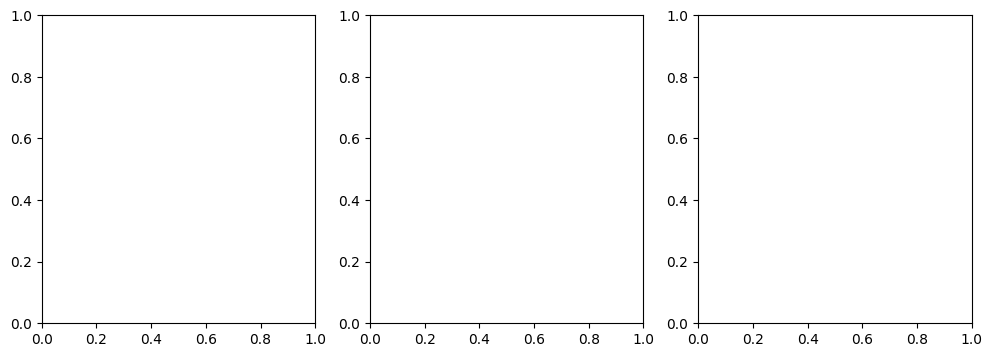

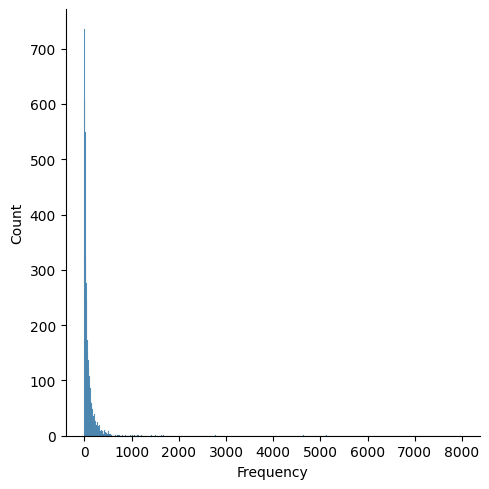

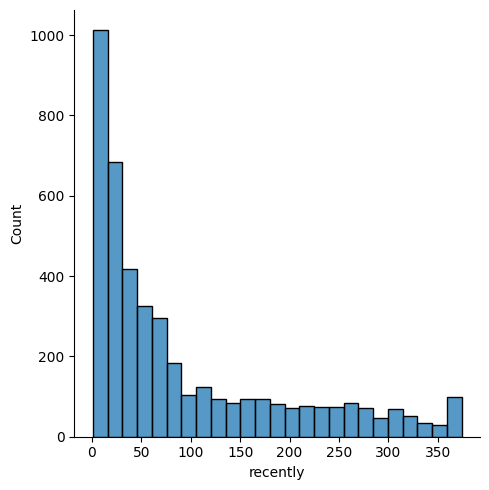

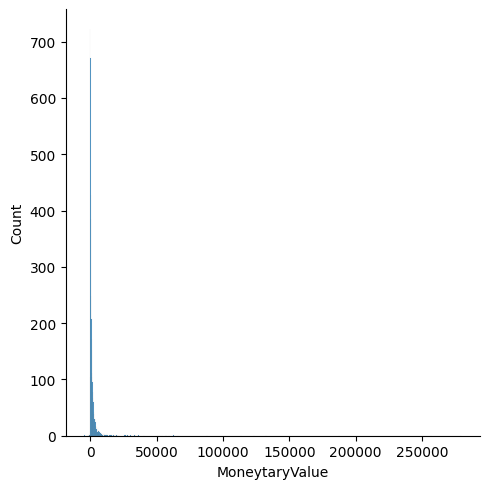

In [11]:
fig,ax=plt.subplots(1,3,figsize=(12,4))
sns.displot(df_customers['Frequency'],ax=ax[0])
sns.displot(df_customers['recently'],ax=ax[1])
sns.displot(df_customers['MoneytaryValue'],ax=ax[2])
plt.show()

In [12]:
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.distplot(df_customers[x], ax=ax[0,0])
    sns.distplot(np.log(df_customers[x]), ax=ax[0,1])
    sns.distplot(np.sqrt(df_customers[x]), ax=ax[1,0])
    sns.distplot(stats.boxcox(df_customers[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()
    
    print(df_customers[x].skew().round(2))
    print(np.log(df_customers[x]).skew().round(2))
    print(np.sqrt(df_customers[x]).skew().round(2))
    print(pd.Series(stats.boxcox(df_customers[x])[0]).skew().round(2))

C:\Users\PC\AppData\Local\Temp\ipykernel_12244\759705056.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_customers[x], ax=ax[0,0])
C:\Users\PC\AppData\Local\Temp\ipykernel_12244\759705056.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df_customers[x]), ax=ax[0,1])
C:\Users\PC\

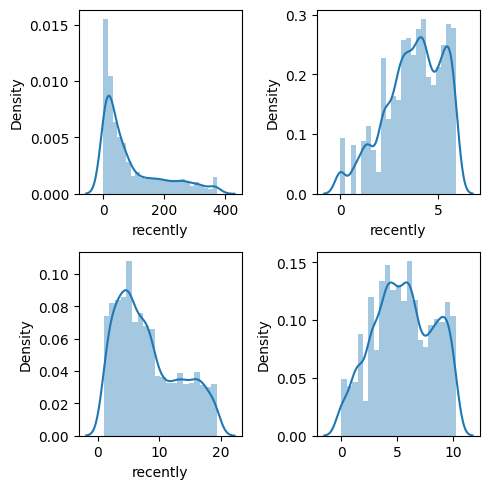

1.25
-0.53
0.59
-0.07


In [13]:
analyze_skewness('recently') #sqrt

C:\Users\PC\AppData\Local\Temp\ipykernel_12244\759705056.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_customers[x], ax=ax[0,0])
C:\Users\PC\AppData\Local\Temp\ipykernel_12244\759705056.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df_customers[x]), ax=ax[0,1])
C:\Users\PC\

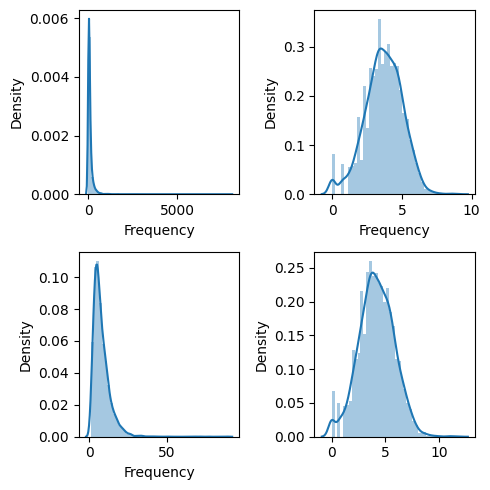

18.15
-0.24
3.2
0.0


In [14]:
analyze_skewness('Frequency') #boxcox

In [15]:
df_customers_t=pd.DataFrame()
df_customers_t['recently']=np.sqrt(df_customers['recently']).values
df_customers_t['Frequency']=stats.boxcox(df_customers['Frequency'])[0]
df_customers_t['MoneytaryValue']=pd.Series(np.cbrt(df_customers['MoneytaryValue'])).values

In [16]:
df_customers_t.head()

,recently,Frequency,MoneytaryValue
0,18.055470,0.707055,0.000000
1,1.414214,6.060363,16.273929
2,8.660254,3.794006,12.158183
3,4.358899,4.862047,12.068017
4,17.606817,3.075409,6.941001


In [17]:
#transform data(standard)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df_customers_t)
df_customers_t = scaler.transform(df_customers_t)

In [18]:
df_customers_t


array([[ 1.95495164, -2.09807169, -1.92564704],
       [-1.32793444,  1.15134635,  1.33054192],
       [ 0.10152044, -0.22431569,  0.50703791],
       ...,
       [-1.04894697, -0.85048402, -0.80307538],
       [-1.21237404,  2.3636609 ,  0.63453134],
       [-0.31331024,  0.39146901,  0.52497099]])

In [19]:
pd.DataFrame(df_customers_t).head()

,0,1,2
0,1.954952,-2.098072,-1.925647
1,-1.327934,1.151346,1.330542
2,0.101520,-0.224316,0.507038
3,-0.747025,0.423978,0.488997
4,1.866444,-0.660498,-0.536848


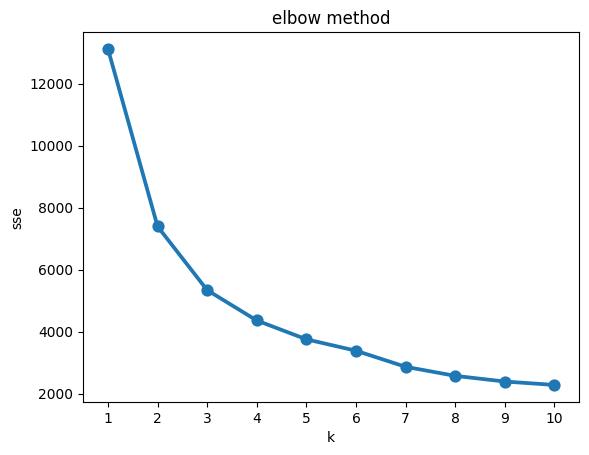

In [21]:
from sklearn.cluster import KMeans
sse={}
for k in range (1,11):
    kmeans=KMeans(n_clusters=k,random_state=42).fit(df_customers_t)
    sse[k]=kmeans.inertia_

plt.title('elbow method')
plt.xlabel('k')
plt.ylabel('sse')
sns.pointplot(x=list(sse.keys()),y=list(sse.values()))
plt.show()

In [22]:
kmeans=KMeans(n_clusters=3, random_state=42).fit(df_customers_t)

In [23]:
df_customers['Cluster']=kmeans.labels_
df_customers.head()

,recently,Frequency,MoneytaryValue,Cluster
CustomerID,,,,
12346.0,326,2,0.00,1
12347.0,2,182,4310.00,2
12348.0,75,31,1797.24,0
12349.0,19,73,1757.55,0
12350.0,310,17,334.40,1


In [25]:
df_customers.groupby('Cluster').agg(
    {'recently':'mean',
     'Frequency':'mean',
     'MoneytaryValue':'mean'
     }
)

,recently,Frequency,MoneytaryValue
Cluster,,,
0,44.794846,45.830030,704.922841
1,228.086221,21.731668,364.452828
2,26.036837,258.198562,5772.907063


In [26]:
#done the data divided into 3 groups, 0 is normal customers with average values, 1 is poor potential customers with low values, 2 is potential customers with high value.